# Measurement Plots

# 1. One arccos call

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

In [186]:
df = pd.read_csv("perf_test_cuda_257136.csv")

## time vs number of streams

[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]


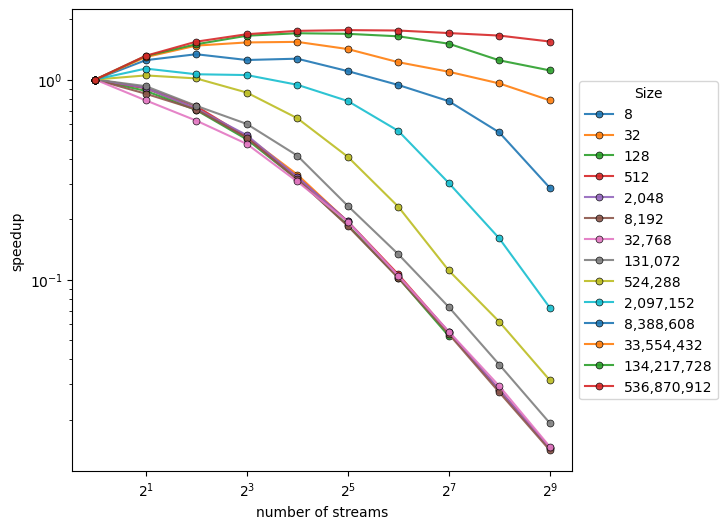

In [42]:
sizes = df['Size'].unique()
print(sizes)
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Learnings:

    1. for size <= 131072 (2^19) no runtime improvement by using streams
    2. The optimal chunk size depends on the array size
    3. Larger array sizes achieve larger improvements
    
    (4.) By increasing the array size we increase both computation and memory -> plotting it vs time doesnt give us valuable information -> we plot time vs num_streams for multiple sizes
    
Welche Plots for single arccos:

    1. Speedup vs streams
    2. runtime vs streams nicht so interessant
    3. runtime vs array size or runtime per value vs array size, um zu zeigen, dass single arccos so wenig computation, dass sich streams erst ab sehr großer array size lohnen
    
    -> noch entscheiden welche in den report sollen

In [43]:
math.log2(8388608)
2**23
math.log2(2097152)
2**21
math.log2(16777216)
2**24

16777216

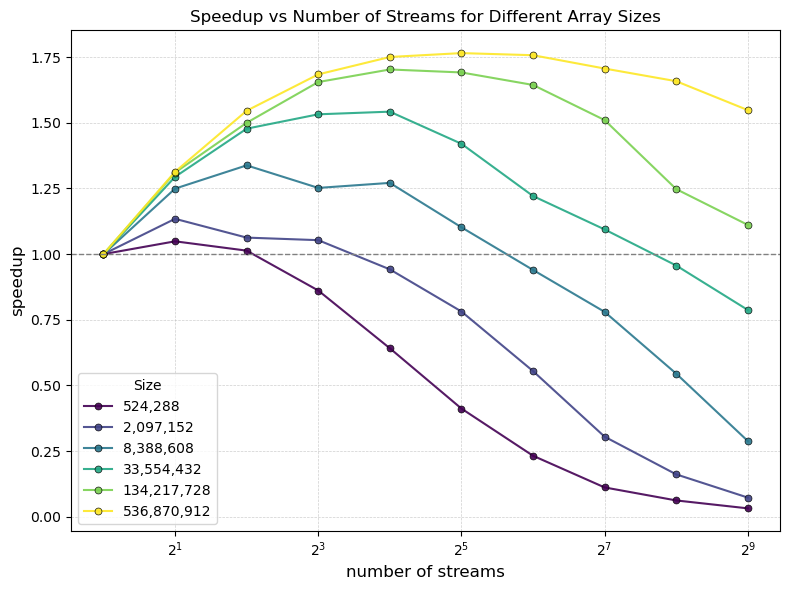

In [193]:
sizes = df['Size'].unique()
reduced_sizes = sizes[sizes > 131072]

numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_sizes)))

for idx, size in enumerate(reduced_sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    plt.plot(sub_df['NUM_STREAMS'], improvement,
             marker='o',                # Dots
             markersize=5,              # Similar to s=10 in scatter
             alpha=0.9,                 # Transparency
             markeredgecolor='black',  # Edge color
             markeredgewidth=0.5,      # Edge thickness
             label=f'{size:,}',
             color = colors[idx])
    
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize = 12)
plt.ylabel('speedup', fontsize = 12)
plt.legend(title="Size", loc='best', fontsize='medium', title_fontsize='medium')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title("Speedup vs Number of Streams for Different Array Sizes")
plt.tight_layout()

plt.savefig('arccos_speedup_streams_size.pdf', bbox_inches='tight')
plt.show()

for 524288/2^19 and  only 2 streams are beneficial


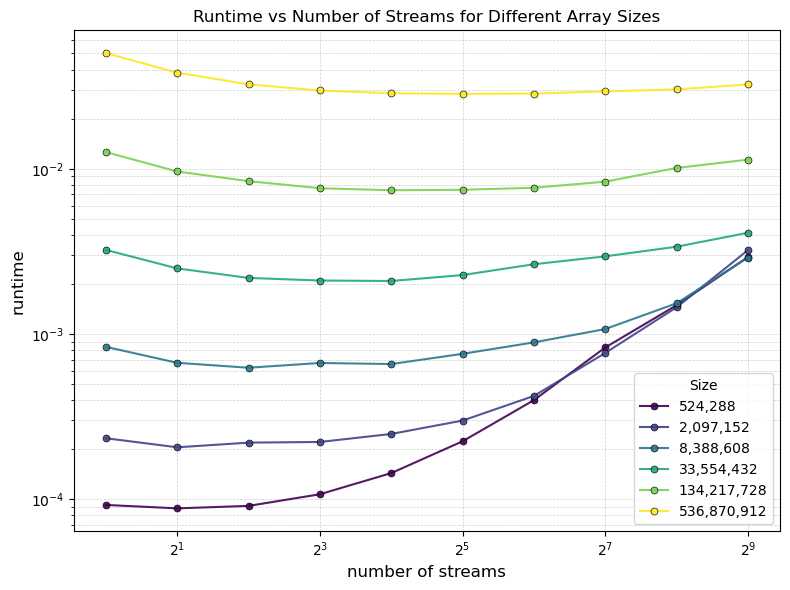

In [201]:
sizes = df['Size'].unique()
reduced_sizes = sizes[sizes > 131072]

numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_sizes)))

for idx, size in enumerate(reduced_sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    plt.plot(sub_df['NUM_STREAMS'], times,
             marker='o',                # Dots
             markersize=5,              # Similar to s=10 in scatter
             alpha=0.9,                 # Transparency
             markeredgecolor='black',  # Edge color
             markeredgewidth=0.5,      # Edge thickness
             label=f'{size:,}',
             color = colors[idx])
    
#plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.legend(title="Size", loc='best', fontsize='medium', title_fontsize='medium')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title("Runtime vs Number of Streams for Different Array Sizes")
plt.tight_layout()

plt.savefig('arccos_runtime_streams_size.pdf', bbox_inches='tight')
plt.show()

In [45]:
math.log2(524288)
math.log2(536870912)

29.0

In [46]:
size = 536870912
print("results for size = ", size)
print()

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = times[0] / times[idx]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- speedup ------", improvement)
    print()


results for size =  536870912

1  streams, chunksize =  536870912.0
----- speedup ------ 1.0

2  streams, chunksize =  268435456.0
----- speedup ------ 1.313803005322415

4  streams, chunksize =  134217728.0
----- speedup ------ 1.5461774527831933

8  streams, chunksize =  67108864.0
----- speedup ------ 1.6846019833824712

16  streams, chunksize =  33554432.0
----- speedup ------ 1.7508879448429555

32  streams, chunksize =  16777216.0
----- speedup ------ 1.7657056571970362

64  streams, chunksize =  8388608.0
----- speedup ------ 1.757620246085011

128  streams, chunksize =  4194304.0
----- speedup ------ 1.706881568584852

256  streams, chunksize =  2097152.0
----- speedup ------ 1.6586398902200876

512  streams, chunksize =  1048576.0
----- speedup ------ 1.5485822166512164



max speedup reached for size = 2^29, num_streams = 32: speedup = 1.7657

## time vs array size

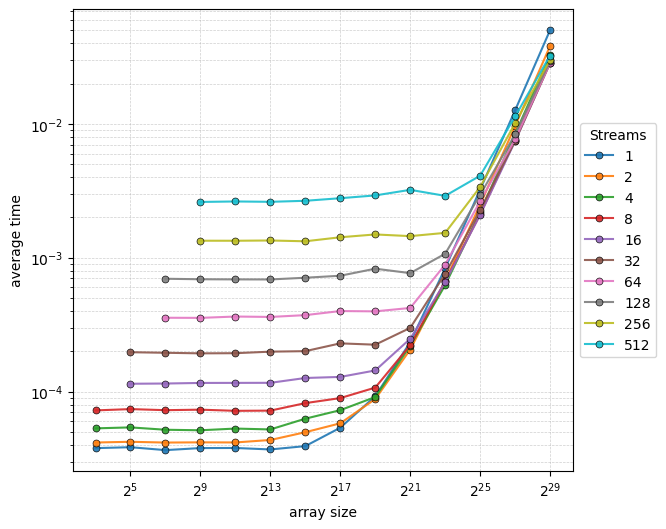

In [47]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['Size'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

1. using streams is only beneficial for big array sizes
   otherwise too much stream overhead

übersichtlicher:

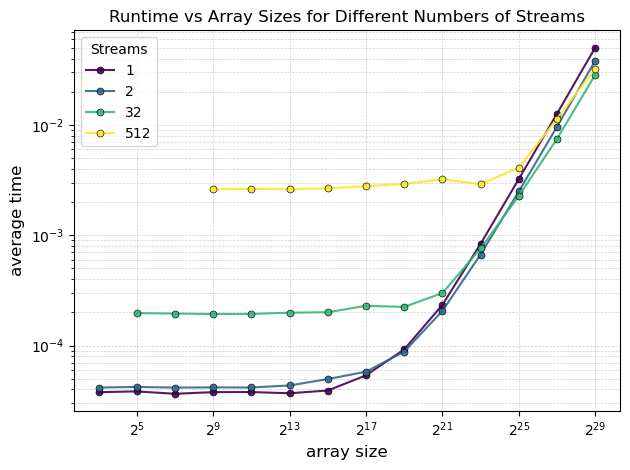

In [199]:
streams = [1, 2, 32, 512]
colors = plt.cm.viridis(np.linspace(0, 1, 4))

for idx, i in enumerate(streams):
    sub_df = df[df['NUM_STREAMS'] == i]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])
    
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('average time', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='best', fontsize='medium', title_fontsize='medium')

plt.title("Runtime vs Array Sizes for Different Numbers of Streams")
plt.tight_layout()

plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


## time per value vs array size

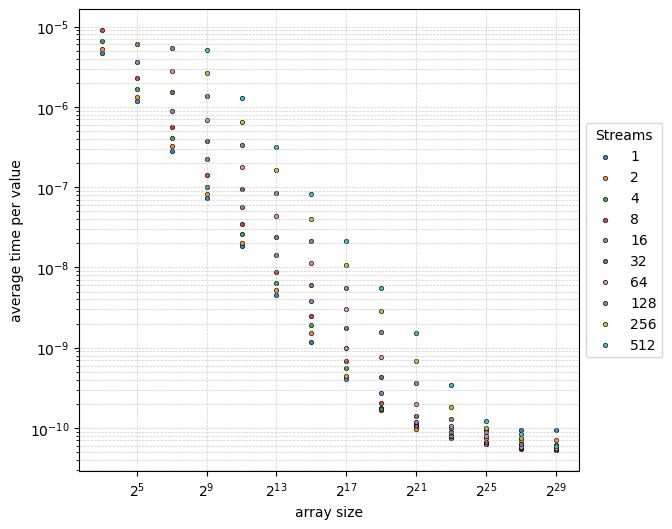

In [49]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
#plt.yscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

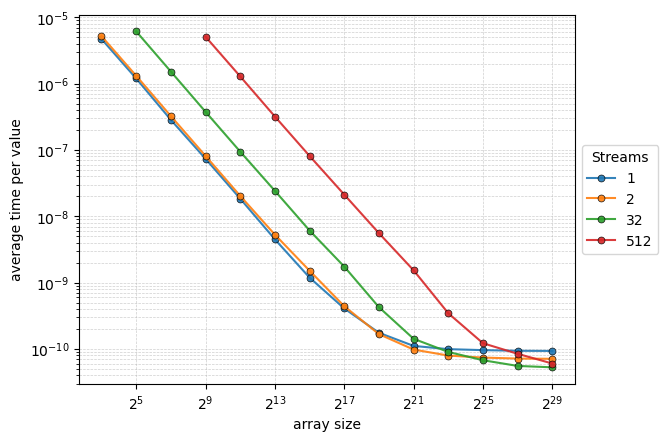

In [200]:
sub_df = df[df['NUM_STREAMS'] == 1]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{1:,}')
sub_df = df[df['NUM_STREAMS'] == 2]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{2:,}')
sub_df = df[df['NUM_STREAMS'] == 32]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{32:,}')
sub_df = df[df['NUM_STREAMS'] == 512]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{512:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


# 2. Multiple arccos calls

# nx, ny vary, nz const

In [51]:
df_multi = pd.read_csv("perf_test_cuda_258768.csv")

In [52]:
numcalls = df_multi["Num_Repetitions"].unique()
print(numcalls)

sizes = df_multi["Size"].unique()
print(sizes)

numstreams = df_multi["Num_Streams"].unique()
print(numstreams)


[  1   2   4   8  16  32  64 128 256 512]
[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]
[  1   2   4   8  16  32  64 128 256 512]


## speedup vs streams 

[  1   2   4   8  16  32  64 128 256 512]


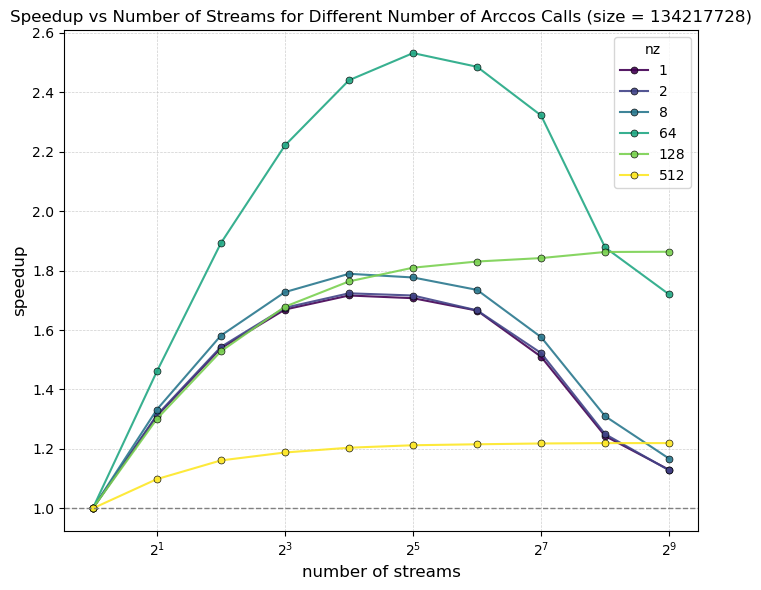

In [205]:
plt.figure(figsize=(8, 6))
print(numcalls)

reduced_calls = np.array([1, 2, 8, 64, 128, 512])

colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_calls)))



size = 134217728

for idx, call in enumerate(reduced_calls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Num_Repetitions'] == call) ]
#         plt.scatter(sub_df['Num_Streams'], sub_df['Time'],
#                 label=f'{call:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Num_Repetitions={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['Num_Streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}',
                color = colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Number of Streams for Different Number of Arccos Calls (size = {size})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"multiple_arccos_speedup_streams_calls.pdf")
plt.show()

calls = 16, 32 fehlen, nochmal laufen lassen???
speedup > 2 -> wie kommts?

## runtime vs streams 

not very important: runtimes

[  1   2   4   8  16  32  64 128 256 512]


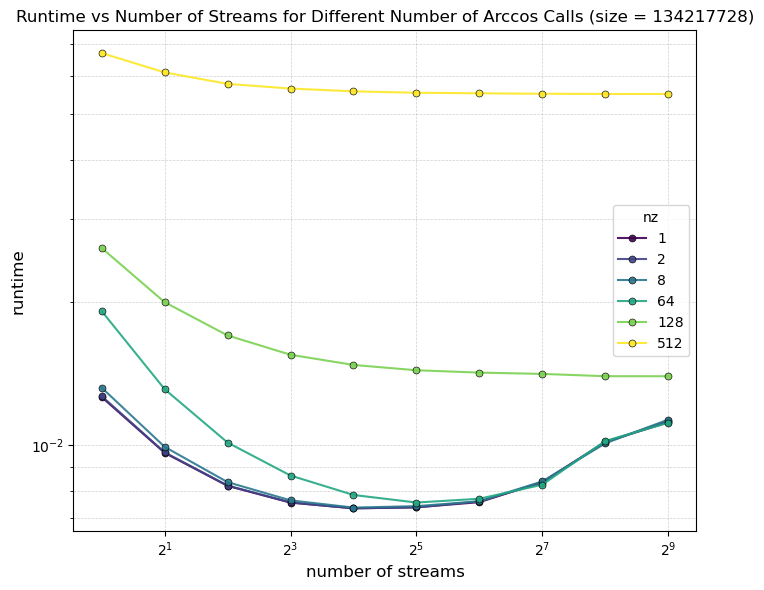

In [208]:
plt.figure(figsize=(8, 6))
print(numcalls)

reduced_calls = np.array([1, 2, 8, 64, 128, 512])

colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_calls)))



size = 134217728

for idx, call in enumerate(reduced_calls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Num_Repetitions'] == call) ]
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Num_Repetitions={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['Num_Streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}',
                color = colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Number of Arccos Calls (size = {size})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"multiple_arccos_runtime_streams_calls.pdf")
plt.show()

# 3. Stencil

nz = 64 const

In [166]:
df_stencil = pd.read_csv("stencil_gpu_scaling_265180.csv")
df_stencil.head()

,ranks,nx,ny,nz,num_iter,time,streams
0,###1,8,8,64,32,0.006015,1
1,###1,8,8,64,32,0.005142,2
2,###1,8,8,64,32,0.004651,4
3,###1,8,8,64,32,0.004506,8
4,###1,8,8,64,32,0.005080,16


In [167]:
nz = df_stencil["nz"].unique()
print(nz)

timesteps = df_stencil["num_iter"].unique()
print(timesteps)

numstreams = df_stencil["streams"].unique()
print(numstreams)

gridx = df_stencil["nx"].unique()
print(gridx)

[64]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[   8   16   32   64  128  256  512 1024 2048 4096]


## speedup vs streams for fixed grid size and variable number of iterations

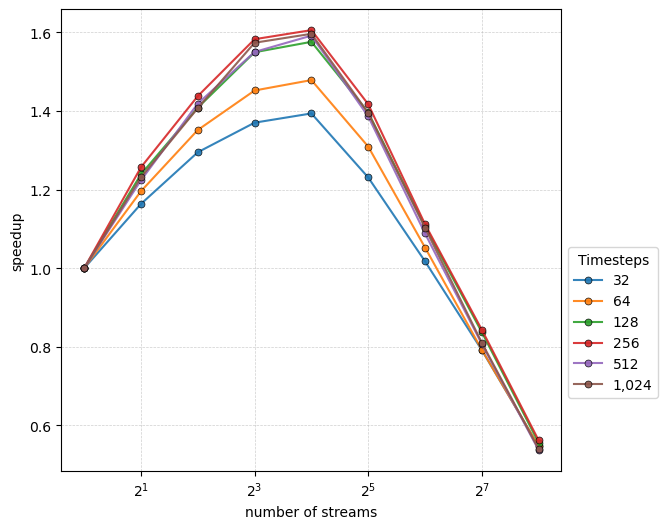

In [168]:
numstreams = df_stencil['streams'].unique()
timesteps = df_stencil['num_iter'].unique()

nx = 256#512#4096 #1024 #512 #128
ny = 256#512#4096 #1024 #512 #128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Timesteps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.title(f"Speedup for nx = ny = ", nx, " and nz = 64")

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.savefig("stencil_nx_256_nz_fixed.pdf")
plt.show()

different speedups for different timesteps, computation time must be big enough to be efficiently hided behind memory copy,

eher nicht reinnehmen als plot?

[   8   16   32   64  128  256  512 1024 2048 4096]


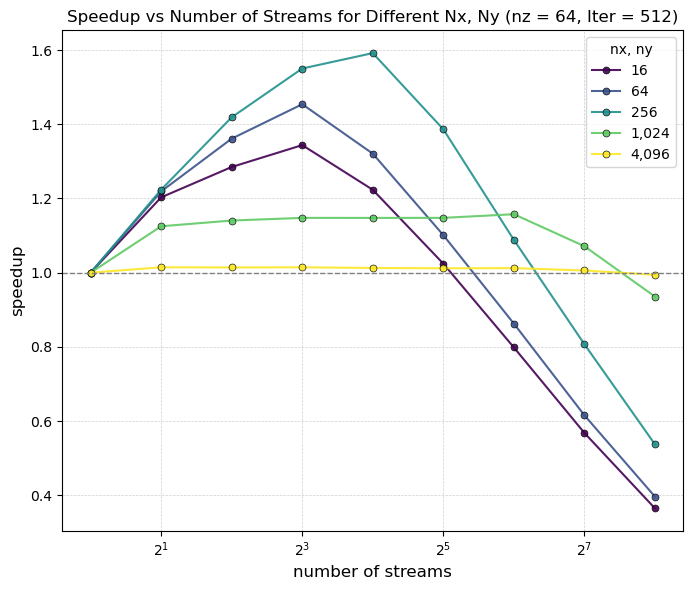

In [169]:
numstreams = df_stencil['streams'].unique()

tsteps = 512

gridx = df_stencil["nx"].unique()
print(gridx)
gridx_second = gridx[1::2]

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(gridx_second)))
#colors = plt.cm.viridis(np.linspace(0, 1, len(gridx)))

for idx, nx in enumerate(gridx_second):
#for idx, nx in enumerate(gridx):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == nx)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nx:,}',
                 color = colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Number of Streams for Different Nx, Ny (nz = 64, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nx, ny", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_speedup_streams_nx_ny.pdf")

plt.savefig(f"stencil_nx_{nx}_nz_fixed.pdf")
plt.show()

[   8   16   32   64  128  256  512 1024 2048 4096]


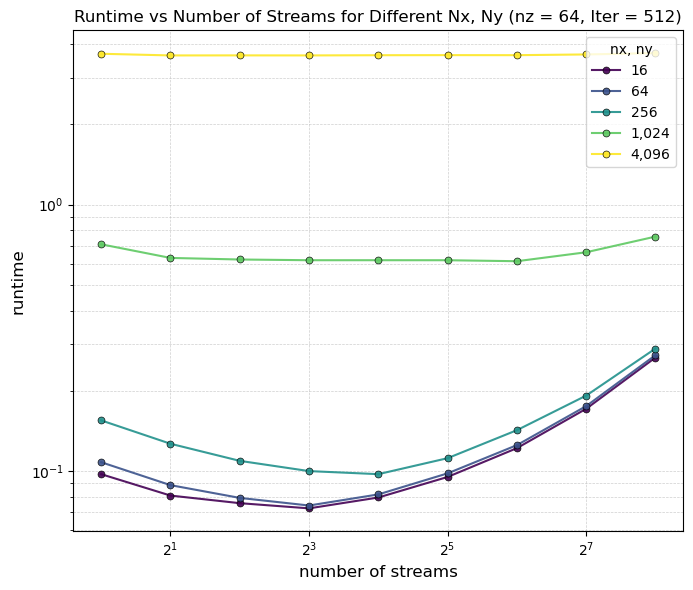

In [170]:
numstreams = df_stencil['streams'].unique()

tsteps = 512

gridx = df_stencil["nx"].unique()
print(gridx)
gridx_second = gridx[1::2]

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(gridx_second)))
#colors = plt.cm.viridis(np.linspace(0, 1, len(gridx)))

for idx, nx in enumerate(gridx_second):
#for idx, nx in enumerate(gridx):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == nx)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nx:,}',
                 color = colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Nx, Ny (nz = 64, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nx, ny", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_runtime_streams_nx_ny.pdf")

plt.savefig(f"stencil_nx_{nx}_nz_fixed.pdf")
plt.show()

For grid 128 x 128 x 64:
1. best speedup for 128 timesteps (~ 1.4)
2. for all timesteps 8 streams show best speedup

better speedups for nx = ny = 256 and 512 -> up to 1.6

low speedup for nx = ny = 1024

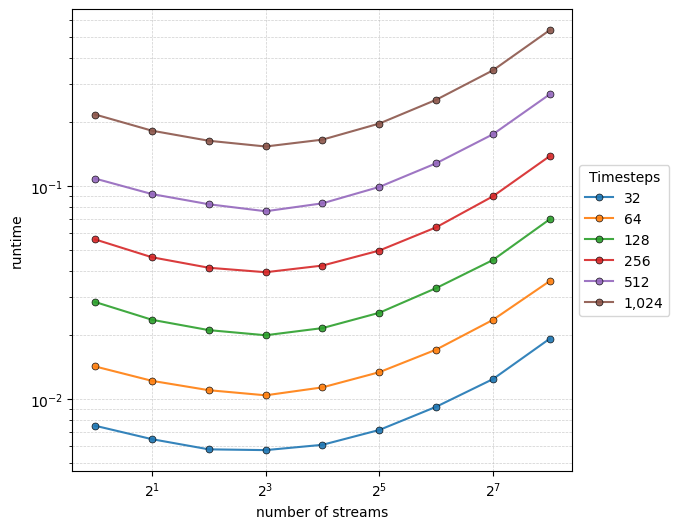

In [183]:
numstreams = df_stencil['streams'].unique()
timesteps = df_stencil['num_iter'].unique()

nx = 128
ny = 128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times

    plt.plot(sub_df['streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('runtime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

# nx = ny = 128 const, nz varies

In [172]:
df_nz = pd.read_csv("stencil_gpu_scaling_265510.csv")
df_nz.head()

,Nx,Ny,Nz,NUM_ITER,NUM_STREAMS,Time
0,128,128,8,32,1,0.001981
1,128,128,8,32,2,0.001855
2,128,128,8,32,4,0.001820
3,128,128,8,32,8,0.001999
4,128,128,8,32,16,0.002447


In [173]:
nz = df_nz["Nz"].unique()
print(nz)

timesteps = df_nz["NUM_ITER"].unique()
print(timesteps)

numstreams = df_nz["NUM_STREAMS"].unique()
print(numstreams)

gridx = df_nz["Nx"].unique()
print(gridx)

[    8    16    32    64   128   256   512  1024  2048  4096  8192 16384
 32768 65536]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[128]


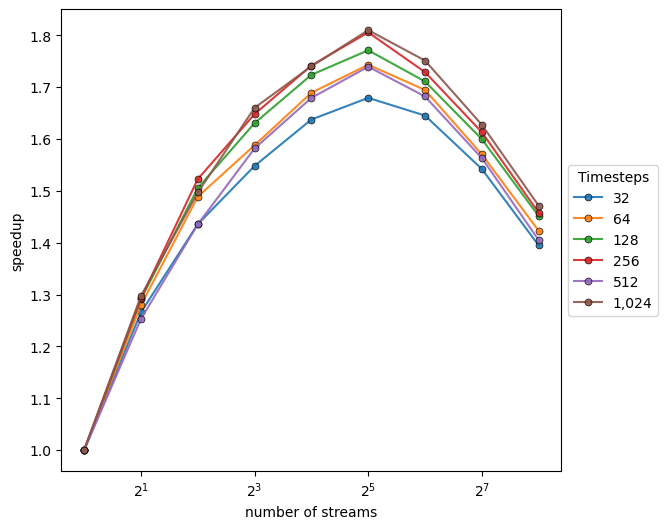

In [174]:
numstreams = df_nz['NUM_STREAMS'].unique()

nz = 1024 

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

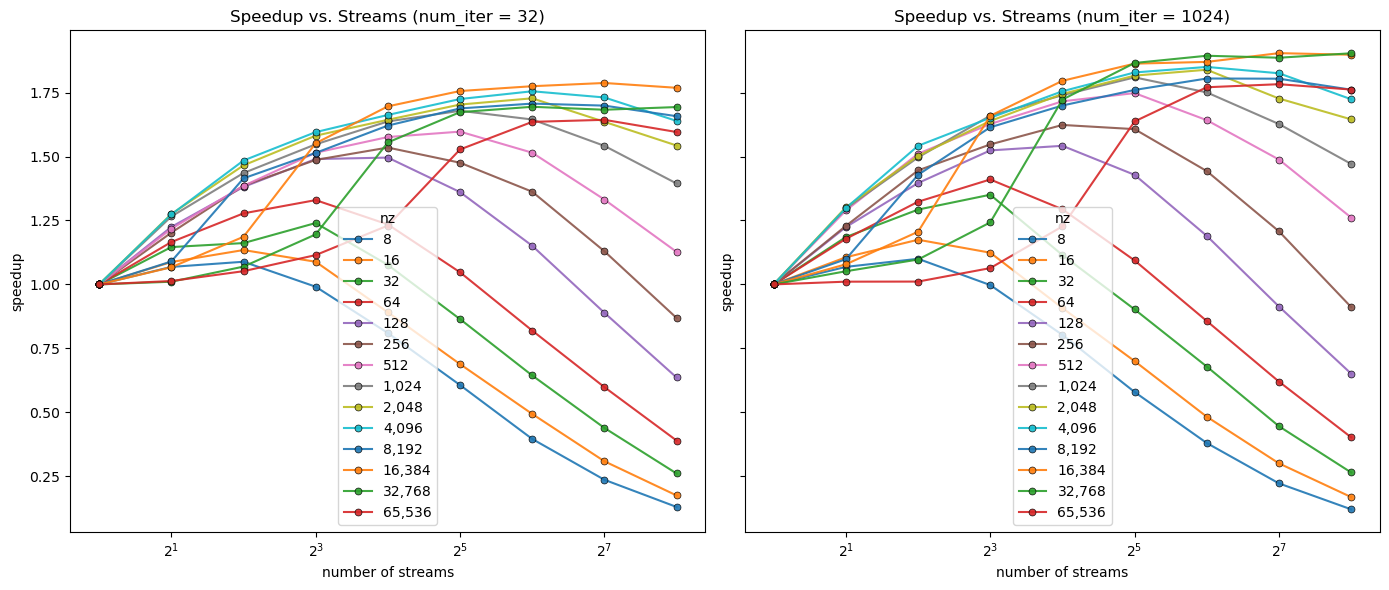

In [175]:
numstreams = df_nz['NUM_STREAMS'].unique()
nz = df_nz["Nz"].unique()

tsteps = 32

# subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
        print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
        continue

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    axs[0].plot(sub_df['NUM_STREAMS'], improvement,
                marker='o',
                markersize=5,
                alpha=0.9,
                markeredgecolor='black',
                markeredgewidth=0.5,
                label=f'{nzs:,}')

axs[0].set_xscale('log', base=2)
axs[0].set_xlabel('number of streams')
axs[0].set_ylabel('speedup')
axs[0].set_title('Speedup vs. Streams (num_iter = 32)')
axs[0].legend(loc='best', title='nz')

tsteps = 1024

for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
        print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
        continue

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    axs[1].plot(sub_df['NUM_STREAMS'], improvement,
                marker='o',
                markersize=5,
                alpha=0.9,
                markeredgecolor='black',
                markeredgewidth=0.5,
                label=f'{nzs:,}')

axs[1].set_xscale('log', base=2)
axs[1].set_xlabel('number of streams')
axs[1].set_ylabel('speedup')
axs[1].set_title('Speedup vs. Streams (num_iter = 1024)')
axs[1].legend(loc='best', title='nz')

plt.tight_layout()
plt.show()


-> number of iterations verändert das Ergebnis nur minimal , deshalb wähle num_iter = 512 für Analyse

[    8    32   128   512  2048  8192 32768]


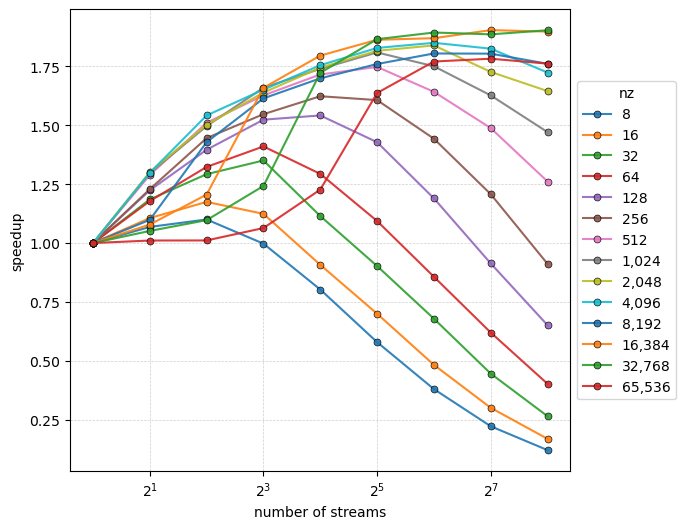

In [176]:
numstreams = df_nz['NUM_STREAMS'].unique()
nz = df_nz['Nz'].unique()
nz_second = nz[::2]
print(nz_second)

timesteps = 512 

plt.figure(figsize=(8, 6)) 

for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

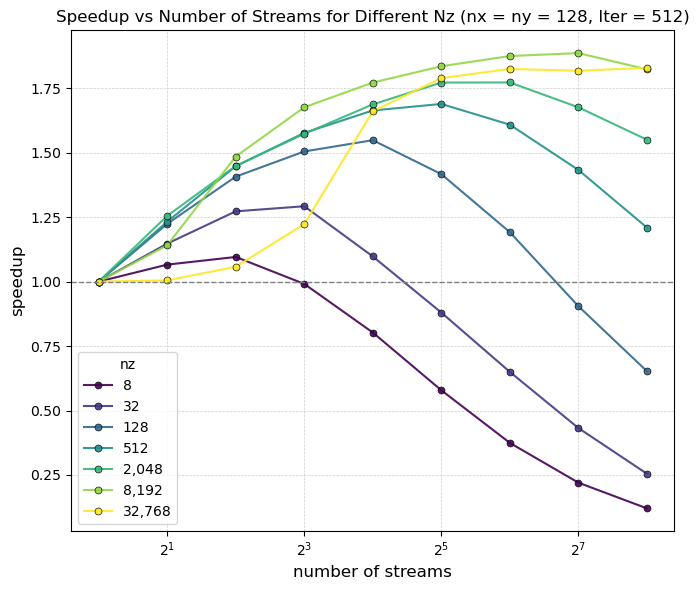

In [177]:
####### use for report #############################

tsteps = 512 

plt.figure(figsize=(8, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(nz_second)))



for idx, nzs in enumerate(nz_second):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}',
                 color=colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Number of Streams for Different Nz (nx = ny = 128, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_speedup_streams_nz.pdf")
plt.show()

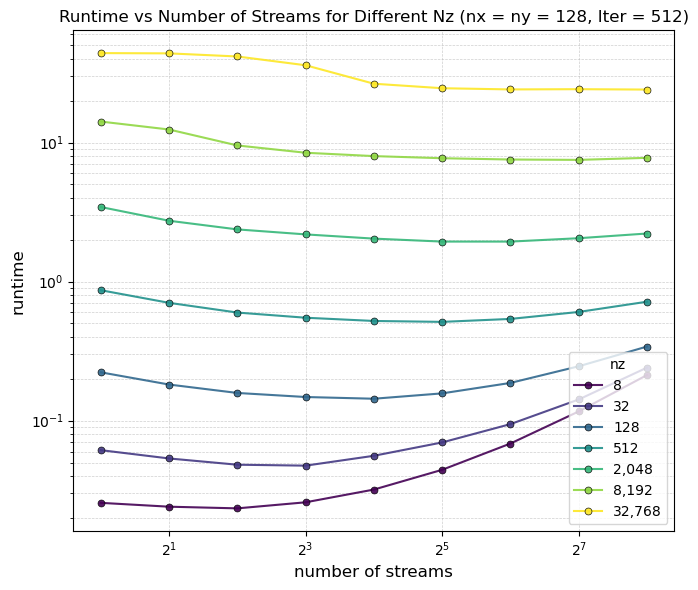

In [178]:
####### use for report #############################

tsteps = 512 

plt.figure(figsize=(8, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(nz_second)))



for idx, nzs in enumerate(nz_second):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}',
                 color=colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Nz (nx = ny = 128, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='lower right', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_runtime_streams_nz.pdf")
plt.show()

In [179]:
tsteps = 512
nz = 8192
print("results for iterations = ", tsteps," and nz = ", nz)
print()

sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz)]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = times[0] / times[idx]
    print(numstreams[idx], " streams")
    print("----- speedup ------", improvement)
    print()

results for iterations =  512  and nz =  8192

1  streams
----- speedup ------ 1.0

2  streams
----- speedup ------ 1.1407482614966842

4  streams
----- speedup ------ 1.4852225767092577

8  streams
----- speedup ------ 1.6760551707807967

16  streams
----- speedup ------ 1.7719345237350208

32  streams
----- speedup ------ 1.8352729483660952

64  streams
----- speedup ------ 1.8748890837189467

128  streams
----- speedup ------ 1.8862981957530043

256  streams
----- speedup ------ 1.8233007658048679

